In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
%pylab inline
rcParams['savefig.dpi'] = 600
rcParams['font.size'] = 22
plt.close('all')
%pwd
plotme= True
figuredir = './figures'
%mkdir figures
from tabulate import tabulate
def save_fig(name,dpi=300, *args, **kwargs):
        plt.savefig(figuredir+name,dpi=dpi, bbox_inches='tight')
        

Populating the interactive namespace from numpy and matplotlib
mkdir: figures: File exists


In [2]:
thedir = '/Users/pwolfram/Documents/ReportsPresentations/MPASOcoreII/300yrGtransects/'
ds = xr.open_dataset(thedir + '/transport_normalVelocity.nc')
d2 = xr.open_dataset(thedir + '/transport_normalBolusVel.nc')
hr = xr.open_dataset(thedir + '/transport18to6.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:        (Time: 3720, nTransects: 15)
Coordinates:
  * Time           (Time) float64 0.04252 0.1233 0.2042 0.2877 0.3713 0.4549 ...
Dimensions without coordinates: nTransects
Data variables:
    TransectNames  (nTransects) |S64 'Drake Passage' 'Tasmania-Ant' ...
    Transport      (Time, nTransects) float64 149.3 164.7 153.8 -12.86 ...

In [4]:
ds.TransectNames

<xarray.DataArray 'TransectNames' (nTransects: 15)>
array(['Drake Passage', 'Tasmania-Ant', 'Africa-Ant', 'Antilles Inflow',
       'Mona Passage', 'Windward Passage', 'Florida-Cuba', 'Florida-Bahamas',
       'Indonesian Throughflow', 'Agulhas', 'Mozambique Channel',
       'Bering Strait', 'Lancaster Sound', 'Fram Strait', 'Robeson Channel'],
      dtype='|S64')
Dimensions without coordinates: nTransects

In [5]:
# filter out unneeded data

# observations (Positive values are north and eastward, see Ringler et al 2013).  References from zotero shared "observations" folder in ACME Land Ice-Ocean Coupling papers
obs = {'Drake Passage': {'mean': 147.5 , 'std dev': 27.5, 'ref': '\citep{donohue_mean_2016,nowlin_physics_1986}'}, 
       'Tasmania-Ant': {'mean': 157, 'std dev': 10, 'ref': '\citep{ganachaud_improved_2000,ganachaud_large-scale_2003}'},
       'Africa-Ant': {'mean': 150, 'std dev': 30, 'ref': 'Estimated from Drake and Tasmania-Ant passages from \citep{ganachaud_improved_2000,ganachaud_large-scale_2003}'},
       'Indonesian Throughflow': {'mean': -15, 'std dev': 4, 'ref': '\citep{sprintall_direct_2009}'},
       'Agulhas': {'mean': -70, 'std dev': 20, 'ref': '\citep{bryden_role_2001}' },
       'Mozambique Channel': {'mean': -16, 'std dev': 13, 'ref': '\citep{van_der_werf_comparison_2010}'},
       'Antilles Inflow': {'mean': -18.4, 'std dev': 4.7, 'ref': '\citep{johns_atlantic_2002, roemmich_circulation_1981}'},
       'Mona Passage': {'mean': -2.6, 'std dev': 1.2, 'ref': '\citep{johns_atlantic_2002, roemmich_circulation_1981}'},
       'Windward Passage': {'mean': 6.0, 'std dev': 3, 'ref': '\citep{johns_atlantic_2002, roemmich_circulation_1981}'},
       'Florida-Cuba': {'mean': 31, 'std dev': 1.5, 'ref': '\citep{johns_atlantic_2002, roemmich_circulation_1981}'},
       'Florida-Bahamas': {'mean': 31.5, 'std dev': 1.5, 'ref': '\citep{johns_atlantic_2002, roemmich_circulation_1981}'},
       'Bering Strait': {'mean': 0.8, 'std dev': 0.3, 'ref': '\citep{roach_direct_1995}'},
       'Lancaster Sound': {'mean': 0.8 , 'std dev': 0.3, 'ref': '\citep{prinsenberg_monitoring_2005}'},
       'Fram Strait': {'mean': -3, 'std dev': 3, 'ref': '\citep{schauer_arctic_2004}'},       
       'Robeson Channel': {'mean': -0.7 , 'std dev': .2 , 'ref': '\citep{maltrud_eddy_2005}'}
       }

In [6]:
def check_in_range(amean, astddev, bmean, bstddev):
    amax = amean + astddev
    amin = amean - astddev
    bmax = bmean + bstddev
    bmin = bmean - bstddev
    
    inrange = ((amin < bmax) and (amin > bmin)) or ((amax < bmax) and (amax > bmin))
    return inrange

# build the headers    
headers = []
headers.append('Transect location')
headers.append('EC60to30 (Sv)')
#headers.append('EC60to30 2nd(Sv)')
#headers.append('Result in range?')
headers.append('RRS18to6 (Sv)')
headers.append('Observation (Sv)')
headers.append('Observation reference')
#for atrans in ds.TransectNames:
#    headers.append(atrans.values)
    
table = []
# structure data into table format
for name, mean, stddev, name2, mean2, stddev2, hrname, hrmean, hrstddev in  \
        zip(ds.TransectNames.values, ds.Transport.mean('Time').values, ds.Transport.std('Time').values,
            d2.TransectNames.values, d2.Transport.mean('Time').values, d2.Transport.std('Time').values,
            hr.TransectNames.values, hr.Transport.mean('Time').values, hr.Transport.std('Time').values,):
    if name != hrname:
        print 'names do not match!'
    newrow = []
    newrow.append(str(name))
    newrow.append(u'%0.1f $\pm$ %0.1f'%(mean, stddev))
    #newrow.append(u'%0.1f $\pm$ %0.1f'%(mean2, stddev2))
    newrow.append(u'%0.1f $\pm$ %0.1f'%(hrmean, hrstddev))
    # observations
    obsmean = obs[str(name)]['mean']
    obsstd = obs[str(name)]['std dev']
    newrow.append(u'%0.1f $\pm$ %0.1f'%(obsmean,obsstd))
    #newrow.append(str(check_in_range(mean, stddev, obsmean, obsstd)))
    newrow.append(str(obs[str(name)]['ref']))
    table.append(newrow)

print 'Note: Africa-Ant completely estimated from a heuristic control volume analysis and could be removed from the table!'
print tabulate(table, headers=headers, floatfmt="0.1f", numalign="center") 

Note: Africa-Ant completely estimated from a heuristic control volume analysis and could be removed from the table!
Transect location       EC60to30 (Sv)     RRS18to6 (Sv)     Observation (Sv)    Observation reference
----------------------  ----------------  ----------------  ------------------  --------------------------------------------------------------------------------------------------------------
Drake Passage           89.8 $\pm$ 16.8   125.5 $\pm$ 6.2   147.5 $\pm$ 27.5    \citep{donohue_mean_2016,nowlin_physics_1986}
Tasmania-Ant            103.3 $\pm$ 19.1  144.4 $\pm$ 5.9   157.0 $\pm$ 10.0    \citep{ganachaud_improved_2000,ganachaud_large-scale_2003}
Africa-Ant              88.4 $\pm$ 16.8   126.7 $\pm$ 6.3   150.0 $\pm$ 30.0    Estimated from Drake and Tasmania-Ant passages from \citep{ganachaud_improved_2000,ganachaud_large-scale_2003}
Antilles Inflow         -14.8 $\pm$ 2.9   -20.5 $\pm$ 3.5   -18.4 $\pm$ 4.7     \citep{johns_atlantic_2002, roemmich_circulation_1981}


In [7]:
latextable = tabulate(table, headers=headers, floatfmt=".2f", numalign="center", tablefmt="latex_booktabs").replace('\\{','{').replace('\\}','}').replace('\\_','_').replace(u"\$",u"$").replace(u"\\textbackslash{}",u"\\")
print latextable
with open('transportstable.tex','w') as f:
    f.write(latextable)

\begin{tabular}{lllll}
\toprule
 Transect location      & EC60to30 (Sv)    & RRS18to6 (Sv)    & Observation (Sv)   & Observation reference                                                                                          \\
\midrule
 Drake Passage          & 89.8 $\pm$ 16.8  & 125.5 $\pm$ 6.2  & 147.5 $\pm$ 27.5   & \citep{donohue_mean_2016,nowlin_physics_1986}                                                                  \\
 Tasmania-Ant           & 103.3 $\pm$ 19.1 & 144.4 $\pm$ 5.9  & 157.0 $\pm$ 10.0   & \citep{ganachaud_improved_2000,ganachaud_large-scale_2003}                                                     \\
 Africa-Ant             & 88.4 $\pm$ 16.8  & 126.7 $\pm$ 6.3  & 150.0 $\pm$ 30.0   & Estimated from Drake and Tasmania-Ant passages from \citep{ganachaud_improved_2000,ganachaud_large-scale_2003} \\
 Antilles Inflow        & -14.8 $\pm$ 2.9  & -20.5 $\pm$ 3.5  & -18.4 $\pm$ 4.7    & \citep{johns_atlantic_2002, roemmich_circulation_1981}                        

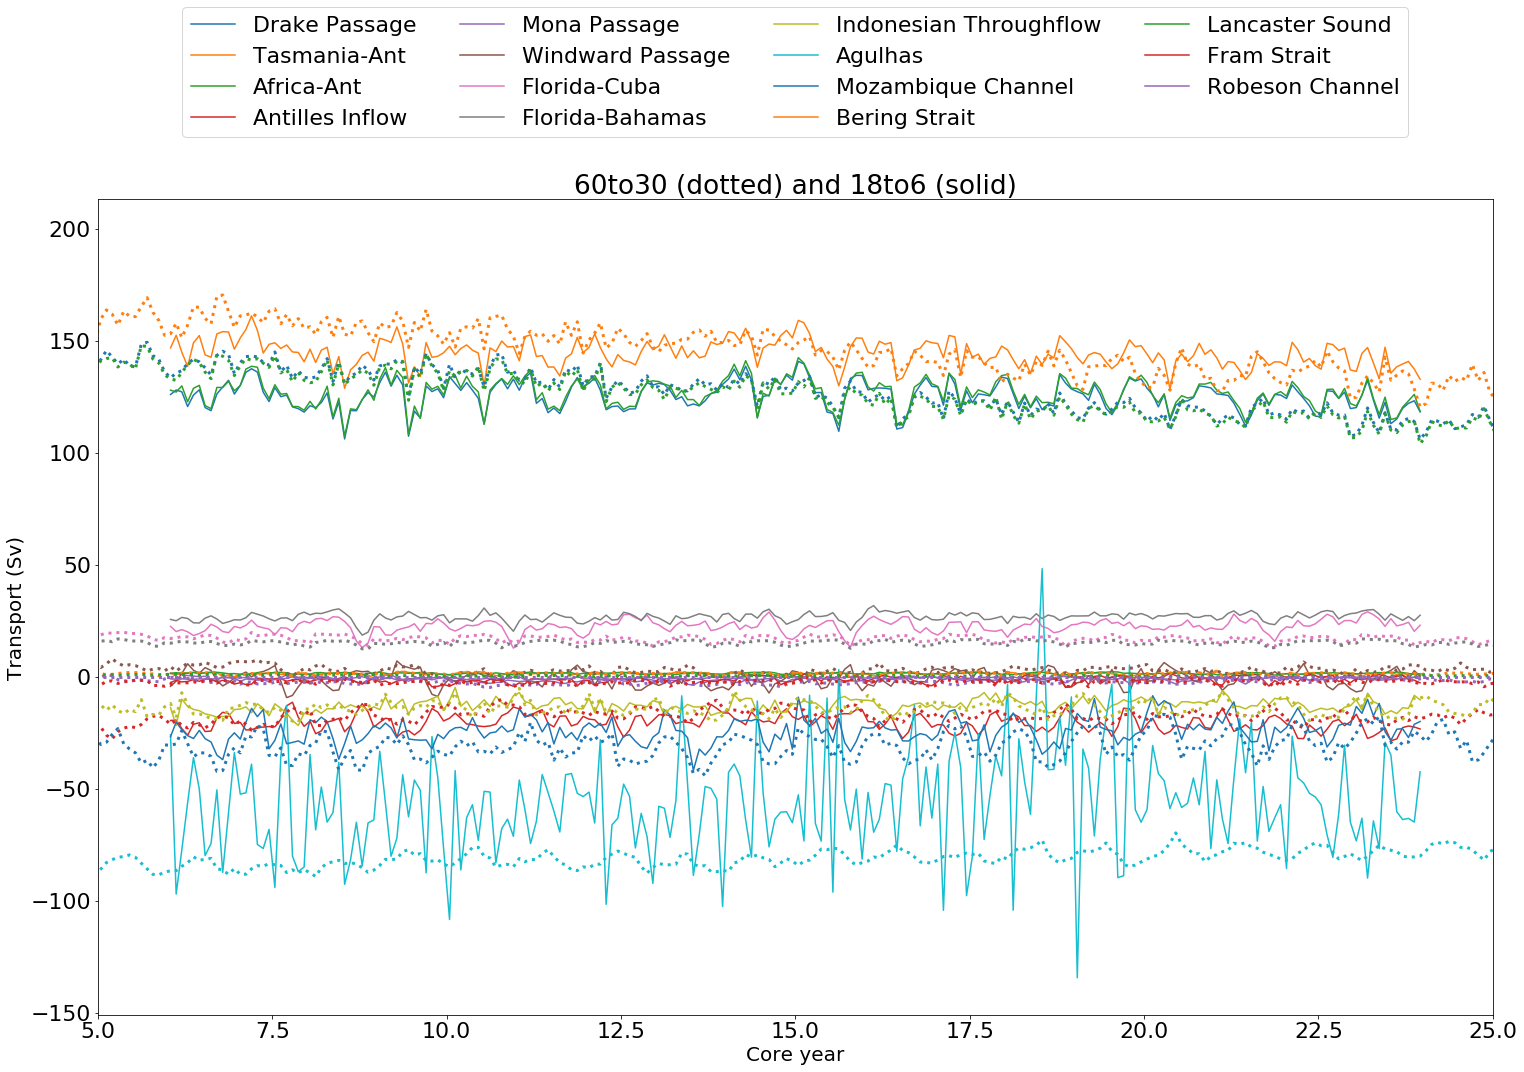

In [68]:
color=[]
plt.figure(figsize=(25,15))
for name, valslowres, name2, vals2 in  \
        zip(ds.TransectNames.values, ds.Transport.values.T,
            hr.TransectNames.values, hr.Transport.values.T):
    if name != name2:
        print 'names do not match!: ', name, name2
    #plt.plot(ds.Time.values, valslowres, ':', label=name)
    ind = plt.plot(hr.Time.values, vals2, '-', label=name2)
    color.append(ind[0].get_color())
plt.gca().legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.25))
for name, valslowres, name2, vals2, acolor in  \
        zip(ds.TransectNames.values, ds.Transport.values.T,
            hr.TransectNames.values, hr.Transport.values.T, color):
    if name != name2:
        print 'names do not match!: ', name, name2
    plt.plot(ds.Time.values, valslowres, ':', lw=3, color=acolor, label=name)
    #plt.plot(hr.Time.values, vals2, '-', label=name2)
plt.xlabel('Core year', fontsize=20)
plt.xlim(5,25)
plt.ylabel('Transport (Sv)', fontsize=20)
#plt.yscale('symlog')
plt.title('60to30 (dotted) and 18to6 (solid)')

In [21]:
ds.Transport.values.shape

(3720, 15)